<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Computational Finance

### Model Calibration

Dr Yves J Hilpisch

The Python Quants GmbH

http://tpq.io | [training@tpq.io](mailto:training@tpq.io) | [@dyjh](http://twitter.com/dyjh)

## Agenda

* general considerations
* calibration of short rate component
* calibration of stochastic volatility model
* calibration of jump component
* calibration of complete model

Go to [http://derivatives-analytics-with-python.com](http://derivatives-analytics-with-python.com) to find links to all the resources and Python codes (eg Quant Platform, Github repository).

## General Considerations

Historically, **theoretical valuation** has been seen as a process where a number of input parameters of a model or formula determines the price/value of a derivative instrument. The fundamental assumption behind this reasoning is that you can observe, in principle, anything in the markets that finally determines the price/value of a security &mdash; markets should be, after all, **informationally efficient**. A major example is the Black-Scholes-Merton formula which takes as input six variables &mdash; initial price level of the underlying, the underlying's volatility, the strike price of the option at hand, time-to-maturity, short rate and maybe dividends paid by the underlying. If you put in numerical values for the 6 variables, the formula returns a value for the option at hand.

However, if _**the market is always right**_, what does a model price/value mean which deviates from an observable market value? As earlier sessions discuss, market-based valuation refers to the process where more complex derivatives are valued 'in consistency' with observed market prices of plain vanilla derivatives. Therefore, today's **valuation practice** requires in the first place that valuation models be capable of replicating observed market values of vanilla products sufficiently well.

### Why Calibration At All?

In a narrow sense (i.e. in the theory of continuous processes), market incompleteness implies that a given derivative asset cannot be replicated perfectly by trading in its underlying(s).  In a wider sense (i.e. in the theory of processes with jumps), market incompleteness implies that a given derivative asset cannot be replicated perfectly even if trading in all available (derivative) assets is allowed.

Regarding the special cases of the general market model $\mathcal{M}^{BCC97}$, one can say the following. The model of BSM is complete. The model of H93 is incomplete in a narrow sense but complete in a wider sense since a derivative asset generally can be replicated by trading in both the underlying and another derivative asset. The model of M76 is incomplete even in a wider sense which is due to the jump component having stochastic jump size. To hedge jump risk perfectly, an over-countably infinite number of traded assets would be necessary; of course something not found, neither in practice nor theory.

As a consequence, the model of BCC97 is incomplete in a wider sense, implying that perfect hedges are not possible. Formally speaking, incompleteness leads to non-uniqueness of the risk-neutral probability measure $Q$ and to multiple prices of derivative assets consistent with the absence of arbitrage. A simple example illustrates this insight.

Consider a simple financial market with two dates $t \in \{0,1\}$ and three states of the economy tomorrow, i.e. at $t=1$, which occur with equal probability. There are two assets. First, a risk-less bond $B_{t}$ which pays tomorrow $B_{1}=10$ units of currency for sure and whose price today is $B_{0}=10=(1+r)^{-1} \cdot B_{1}$ such that $r=0.0$. Second, a risky security, called the index, which costs $S_{0}=10$ today and pays tomorrow

$$
S_{1}=\left(\begin{array}[3]{1} 20\\10\\0 \end{array}\right)  
$$

By standard results from linear algebra, the financial market is incomplete (in a narrow sense) since not every payoff at $t=1$ can be replicated via trading in the available securities. Two linearly independent vectors are not enough to form a basis of the $\mathbb{R}^{3}$. At least three are necessary. Consider now the derivative asset 

$$
A_{1}=\left(\begin{array}[3]{1} 16\\4\\0 \end{array}\right) 
$$

which should be valued.

Simple calculations show that perfect replication is not possible. However, absence of arbitrage must hold such that there exists by the Fundamental Theorem of Asset Pricing a martingale measure $Q$ such that

\begin{eqnarray*}
\mathbf{E}^{Q}_{0} \left( S_{1} \right) &=& S_{0} \\
\Rightarrow q^{1} \cdot 20 + q^{2} \cdot 10 + q^{3} \cdot 0 &=& 10 \\
\Leftrightarrow q^{2} &=& 1 - 2\cdot q^{1} \nonumber
\end{eqnarray*}

with  $q^{s}>0$ and $q^{1}+q^{2}+q^{3}=1$ for $Q$ to be a (risk-neutral) probability measure.

One gets

\begin{eqnarray*}
q^{1}+\left( 1-2\cdot q^{1}\right) +q^{3}&=&1\\
\Leftrightarrow q^{3}&=&q^{1} \nonumber
\end{eqnarray*}

As a consequence, every risk-neutral probability measure from the set

$$
\mathbb{Q} = \left\{ Q\in \mathbb{R}^3_{++}: \left( \begin{array}[3]{1} q^{1}\\q^{2}\\q^{3} \end{array} \right)
\equiv \left( \begin{array}[3]{1} \nu\\1-2\nu\\ \nu \end{array} \right),0<\nu<\frac{1}{4} \right\} \nonumber
$$

makes the index a martingale consistent with the absence of arbitrage.

Also, every price $A_{0}$ of the derivative asset $A_{1}$ which lies in the open interval $]\underline{A_{0}},\overline{A_{0}}[$ with

$$
\underline{A_{0}}\equiv \mathbf{E}^{Q(\nu =0)}\left[ A_{1}\right] =4.0 
$$

and

$$
\overline{A_{0}}\equiv \mathbf{E}^{Q(\nu =0.25)}\left[ A_{1}\right]=1+8=9.0 
$$

is consistent with the absence of arbitrage.

Market incompleteness leaves one with the unsatisfactory situation that there are multiple prices for derivative assets. To resolve this problem, calibration comes into play. Because there is, in general, no simple criterion to choose among the possible risk-neutral probability measures, one has to ask the market for the right one&mdash;this is what calibration is about. Or as Björk (2004), p. 221, puts it:

> "Question: Who chooses the martingale measure? ... Answer: The market!"

Therefore, calibration yields the **market-consistent** risk-neutral probability measure in the sense that (i) liquidly traded plain vanilla options are priced correctly and (ii) other (exotic) derivatives are priced such that prices are both consistent with the absence of arbitrage and indeed unique.

### Which Role Play Different Model Components?

Formally speaking, calibration means to find parameters for a given model such that it is market-consistent as explained before. It is known that the model of M76 is not capable of perfectly replicating prices for multiple strikes and maturities. However, for the short maturity and a subset of option prices the fit is pretty good. Therefore, the **jump component** of the general model of BCC97 will take care of **short term** option prices. On the other hand, it is well-known that the **stochastic volatility** model of H93 is capable of replicating option prices of **longer maturities** pretty well.

Therefore, when calibrating a financial market model simultaneously to short as well as longer maturities one needs both a jump component and stochastic volatility. Gallucio and Le Cam (2008), p. 9, conclude:


> "... no matter how parameters are chosen, it is impossible to make a pure [stochastic volatility] or jumps model consistent with the observed shape of the smile ... This further reinforces the view that option markets are consistent with the simultaneous presence of both jumps and stochastic volatility in the asset dynamics."

The model of **Bates (1996)** is one of the most simple ones to accommodate both jumps and stochastic volatility. Its attractiveness further stems from the fact that the two sub-models, H93 and M76, are well understood and widely applied in theory and practice.

What about **stochastic short rates**? It is well-known that the impact of short rate volatility is almost negligible when calibrating models to short maturity option prices (cf. BCC97). However, the longer the maturities become the more important becomes short rate volatility such that it obviously cannot be neglected in the context of equity derivatives &mdash; which can have pretty long maturities.

Stochastic short rates play a dual role in the general market model. First, they are important factors in the risk-neutral valuation and hedging of derivative assets in general. Second, they are central for determining present values of deterministic cash flows, like, for instance, liabilities or cash flows from bonds. Again, the **model of CIR85** is well understood and widely applied and therefore an obvious choice.

The short rate model is to be calibrated to the term structure of interest rates such that it is replicated reasonably well and short rate sensitive instruments, like bonds, options on bonds or swaptions are correctly priced. Due to the zero correlation between the short rate and the index model, the task of calibrating the general model can be separated in two independent procedures.

### What Objective Function?

To calibrate a financial market model, one needs a performance yardstick for the quality of the calibration &mdash; formally, an objective or error function which is to be minimized. In what follows, we use the **Mean-Squared Error (MSE)**:

$$
\min_{p } \frac{1}{N}\sum_{n=1}^{N}\left( C_{n}^{*} - C_{n}^{mod}(p )\right)^{2}
$$

with the $C_{n}^{*}$ being the market or input prices and the $C_{n}^{mod}$ being the model or output prices for options $n=1,...,N$ given parameter vector $p$.

### What Market Data?

The **first** question regarding market data of course is what the relevant index is when analyzing equity index derivatives. This generally is pretty easy to answer; S&P500, EURO STOXX 50, DAX or SMI could be candidates. The **second** is also relatively easy: which interest rates, yields, bond prices, etc. to use for the calibration of the short rate model. The **third**, more difficult to answer, question is about the concrete option quotes to be included in the calibration.

If one has decided upon the option provider itself &mdash; say, for example, the Eurex for the EURO STOXX 50 index &mdash; the decision is about the option maturities and strikes to be included. In addition, there are different quotes per option, like bid, ask, last and settlement price. There is also no guarantee that market prices are arbitrage-free such that the need to adjust raw market data may arise.

We use a set of 15 market quotes for European call options as follows:

* **maturities**: three maturities (all less than one year)
* **strikes**: five strikes per maturity

Since the subsequent analysis focuses on equity derivatives on the EURO STOXX 50 index, the following market data is used for calibration of the BCC97 model (all data from 30. September 2014):

* **short rate component**: Eonia rate and Euribor rates (up to one year)
* **equity component**: European call options on the EURO STOXX 50 offered by the Eurex in Frankfurt

## Calibration of Short Rate Component

Recall the CIR85 stochastic differential equation 

$$
dr_{t}=\kappa_{r} (\theta_{r} -r_{t})dt+\sigma_{r} \sqrt{r_{t}}dZ_{t} 
$$

The task of calibration is to minimize, for all considered times $t$ and a parameter set $\alpha = (\kappa_{r},\theta_{r},\sigma_{r},r_{0})$, simultaneously the differences

$$
\Delta f(0,t) \equiv f(0,t)-f^{CIR85}(0,t;\alpha)
$$

where $f(0,t)$ is the current market implied forward rate for time $t$ and $f^{CIR85}(0,t;\alpha)$ is the current model implied forward rate for time $t$ given parameter set $\alpha$.

If $B_{t}(T),t < T$, denotes the time $t$ price of a zero-coupon bond maturing at time $T$ and paying one unit of currency at that date, then the (instantaneous) forward rate at time $t$ for time $T$ is defined by

$$
f(t,T) \equiv -\frac{\partial B_{t}(T)}{\partial T}
$$

with $f(0,t)$ as an obvious special case. Furthermore, the short rate at time $t$ follows from $r_{t}=f(t,t)$.

The other way round, zero-coupon bond prices are uniquely determined by the forward rate curve:

$$
B_{t}(T) = \exp\left(-\int^{T}_{t} f(t,s) ds\right)
$$

With this background knowledge, the usefulness of the following formula for the forward rates in the CIR85 short rate model becomes clear.

\begin{eqnarray}
f^{CIR85}(0,t;\alpha) = \frac{\kappa_{r} \theta_{r}\left(e^{\gamma t}-1\right)}{2\gamma+(\kappa_{r}+\gamma)\left(e^{\gamma t}-1\right)} \nonumber \\
+r_{0} \frac{4 \gamma ^{2} e^{\gamma t}}{\left(2\gamma+(\kappa_{r}+\gamma)\left(e^{\gamma t}-1\right)\right)^{2}} 
\end{eqnarray}

where

$$
\gamma \equiv \sqrt{\kappa_{r}^{2}+2\sigma^{2}_{r}}
$$

with the parameters and variables as defined as usual.

The time $t$ price a of zero-coupon bond maturing at time $T$ and paying one unit of currency is given by the affine formula

$$
B_{t}(T) = a(t,T)e^{-b(t,T)\mathbf{E}^{\mathbf{Q}}_{0}(r_{t})}
$$

where

$$
a(t,T) \equiv \left[\frac{2\gamma \exp(0.5(\kappa_{r}+\gamma)(T-t))}{2\gamma+(\kappa_{r}+\gamma)(e^{\gamma (T-t)}-1)}\right]^{\frac{2\kappa_{r}\theta_{r}}{\sigma_{r}^{2}}}
$$

and

$$
b(t,T) \equiv \frac{2\left(e^{\gamma (T-t)}-1\right)}{2\gamma+(\kappa_{r}+\gamma)\left(e^{\gamma (T-t)}-1\right)}
$$

For the expectation value of $r_{t}$ it holds $\mathbf{E}^{\mathbf{Q}}_{0}(r_{t})=\theta_{r}+e^{-\kappa_{r} t}(r_{0}-\theta_{r})$.

There is a one-to-one correspondence between zero-coupon bond yields for different maturities and forward rates via

$$
f(0,T) = Y(0,T)+\frac{\partial Y(0,T)}{\partial T}\cdot T
$$

with $Y(0,T)$ as the yield today of a bond maturing at $T$.

The (continuous) yield for a zero-coupon bond solves the equation 

\begin{eqnarray}
B_{T}(T)&=&B_{0}(T)e^{Y(0,T) \cdot T} \nonumber \\ 
\Leftrightarrow Y(0,T) &=& \frac{\log B_{T}(T)-\log B_{0}(T)}{T} \nonumber 
\end{eqnarray}

With the final value of the bond normalized to 1,  one has

$$
Y(0,T)=-\frac{\log (B_{0}(T))}{T}
$$

Unfortunately, spot rates and bond yields are generally only quoted for selected, discrete maturities so that the need arises to interpolate between the single data points. With a continuously differentiable interpolating function &mdash; e.g. from a cubic splines regression &mdash; one can derive the partial derivative from before and therewith forward rates for arbitrary times $T$.

Euribor rates are quoted on a 30/360 day count basis. For what follows, Euribor rates therefore have to be transformed into continuous rates (continuous yield of a unit zero-coupon bond). As an example, take the 6-month Euribor rate which is 0.043%. The corresponding factor is

$$
f_s^{6m} = 1 + 180/360 \cdot 0.00043
$$

The equivalent annualized continuous rate then is

$$
f_c^{6m}=360/180 \cdot \log{(f_s^{6m})}
$$

This ensures that

$$
1 + 180/360 \cdot f_s^{6m} = e^{180/360 \cdot f_c^{6m}}
$$

holds.

We are ready to implement the calibration in Python.

In [127]:
import math
import numpy as np
np.set_printoptions(suppress=True,
        formatter={'all': lambda x: '%7.6f' % x})
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import scipy.interpolate as sci
from scipy.optimize import fmin
from CIR_zcb_valuation_gen import B

The market data.

In [129]:
#
# Market Data: Eonia rate (01.10.2014) + Euribor rates
# Source: http://www.emmi-benchmarks.eu
# on 30. September 2014
#
t_list = np.array((1, 7, 14, 30, 60, 90, 180, 270, 360)) / 360. 
r_list =  np.array((-0.032, -0.013, -0.013, 0.007, 0.043,
                    0.083, 0.183, 0.251, 0.338)) / 100

factors = (1 + t_list * r_list)
zero_rates = 1 / t_list * np.log(factors)

r0 = r_list[0] # 0.0  # set to zero 

Interpolation of the market data.

In [131]:
#
# Interpolation of Market Data
#

tck = sci.splrep(t_list, zero_rates, k=3)  # cubic splines
tn_list = np.linspace(0.0, 1.0, 24)
ts_list = sci.splev(tn_list, tck, der=0)
de_list = sci.splev(tn_list, tck, der=1)

f = ts_list + de_list * tn_list
  # forward rate transformation

And a plot of the interpolated data.

Text(0, 0.5, 'rate')

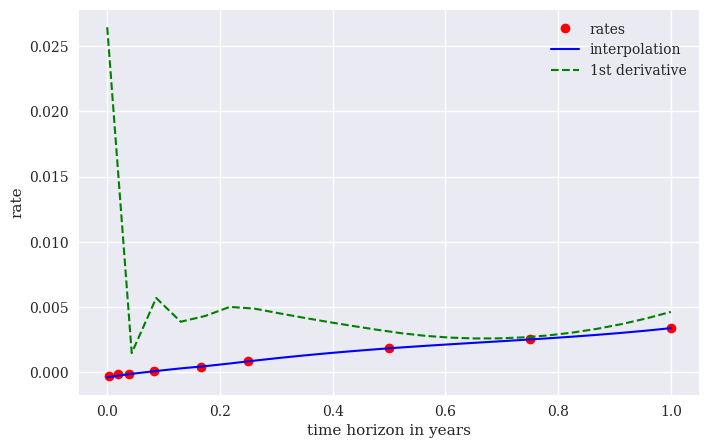

In [133]:
plt.figure(figsize=(8, 5))
plt.plot(t_list, r_list, 'ro', label='rates')
plt.plot(tn_list, ts_list, 'b', label='interpolation', lw=1.5)
  # cubic splines
plt.plot(tn_list, de_list, 'g--', label='1st derivative', lw=1.5) 
  # first derivative
plt.legend(loc=0)
plt.xlabel('time horizon in years')
plt.ylabel('rate')

A function to calculate forward rates.

In [135]:
def CIR_forward_rate(opt):
    kappa_r, theta_r, sigma_r = opt
    t = tn_list
    g = np.sqrt(kappa_r ** 2 + 2 * sigma_r ** 2)
    sum1 = ((kappa_r * theta_r * (np.exp(g * t) - 1)) /
          (2 * g + (kappa_r + g) * (np.exp(g * t) - 1)))
    sum2 = r0 * ((4 * g ** 2 * np.exp(g * t)) /
            (2 * g + (kappa_r + g) * (np.exp(g * t) - 1)) ** 2)
    forward_rate = sum1 + sum2
    return forward_rate

The error function for the calibration.

In [137]:
def CIR_error_function(opt):
    ''' Error function for CIR85 model calibration. '''
    kappa_r, theta_r, sigma_r = opt
    if 2 * kappa_r * theta_r < sigma_r ** 2:
        return 100
    if kappa_r < 0 or theta_r < 0 or sigma_r < 0.001:
        return 100
    forward_rates = CIR_forward_rate(opt)
    MSE = np.sum((f - forward_rates) ** 2) / len(f)
    # print opt, MSE
    return MSE

The function for the calibration procedure &mdash; local optimization only.

In [139]:
def CIR_calibration():
    opt = fmin(CIR_error_function, [1.0, 0.02, 0.1],
            xtol=0.00001, ftol=0.00001,
            maxiter=300, maxfun=500)
    return opt

In [141]:
opt = CIR_calibration()
opt

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


array([0.146849, 0.104511, 0.175197])

A function to visualize the calibration results.

In [143]:
def plot_calibrated_frc(opt):
    ''' Plots market and calibrated forward rate curves. '''
    forward_rates = CIR_forward_rate(opt)
    plt.figure(figsize=(8, 7))
    plt.subplot(211)
    plt.ylabel('forward rate $f(0,T)$')
    plt.plot(tn_list, f, 'b', label='market')
    plt.plot(tn_list, forward_rates, 'ro', label='model')
    plt.legend(loc=0)
    plt.axis([min(tn_list) - 0.05, max(tn_list) + 0.05,
          min(f) - 0.005, max(f) * 1.1])
    plt.subplot(212)
    wi = 0.02
    plt.bar(tn_list, forward_rates - f, width=wi)
    plt.xlabel('time horizon in years')
    plt.ylabel('difference')
    plt.axis([min(tn_list) - 0.05, max(tn_list) + 0.05,
          min(forward_rates - f) * 1.1, max(forward_rates - f) * 1.1])
    plt.tight_layout()

The results visualized.

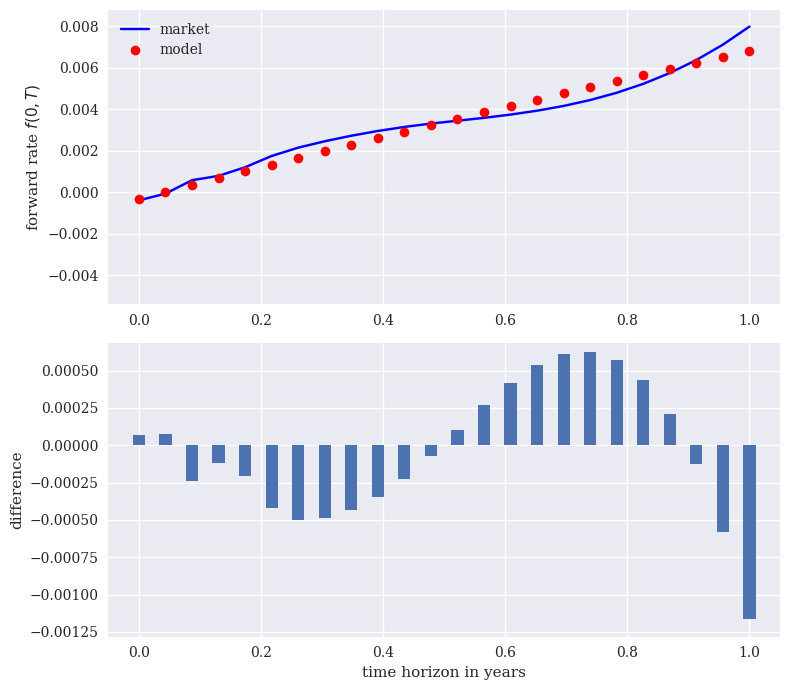

In [145]:
plot_calibrated_frc(opt)

And a function to plot ZCB values.

In [147]:
def plot_zcb_values(p0, T):
    ''' Plots unit zero-coupon bond values (discount factors). '''
    t_list = np.linspace(0.0, T, 20)
    r_list = B([r0, p0[0], p0[1], p0[2], t_list, T])
    plt.figure(figsize=(8, 5))
    plt.plot(t_list, r_list, 'b')
    plt.plot(t_list, r_list, 'ro')
    plt.xlabel('time horizon in years')
    plt.ylabel('unit zero-coupon bond value')

The ZCB values plotted.

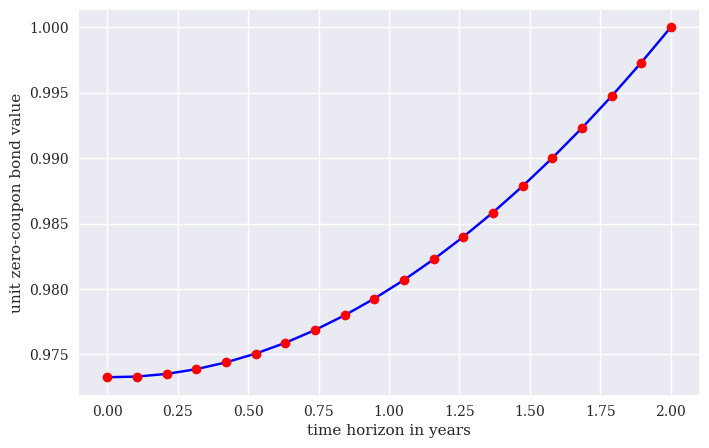

In [149]:
plot_zcb_values(opt, 2)

## Calibration of Equity Component

To have a small but still meaningful subset of market prices in terms of maturities, the subsequent analysis considers **three maturities**:


* 17 October 2014 (17 days)
* 19 December 2014 (80 days)
* 20 March 2015 (171 days)

Maturity day generally is the third Friday of the month if this is a business day.

Per maturity, we consider **five different strikes: 3000, 3100, 3200, 3300, 3400** &mdash; given a spot closing level of 3225.93 of the EURO STOXX 50 on 30. September 2014.

Before proceeding, the right short rates have to be derived from the calibrated CIR85 model since the Fourier transform pricing formula is for constant short rates only. One can recover the right short rate for option maturity $T$ in knowledge of the bond price $B_{0}(T)$ via

$$
\bar{r}^{*}(T) = -\frac{\log B_{0}(T)}{T}
$$

which is equivalent to the continuous yield of the respective zero-coupon bond. This approach is used in the calibration scripts to derive equivalent constant short rates for each maturity, respectively.

### H93 Calibration

First, we calibrate the stochastic volatility component to the market data.

In [151]:
import math
import numpy as np
import pandas as pd
from scipy.optimize import brute, fmin, minimize
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
from BCC_option_valuation import H93_call_value, BCC_call_value
from CIR_calibration import CIR_calibration, r_list
from CIR_zcb_valuation import B

Calibration of short rate model and market data loading.

In [153]:
#
# Calibrate Short Rate Model
#
kappa_r, theta_r, sigma_r = CIR_calibration()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 270
         Function evaluations: 485


In [155]:
#
# Market Data from www.eurexchange.com
# as of 30. September 2014
#
h5 = pd.HDFStore('option_data.h5', 'r')
data = h5['data']  # European call & put option data (3 maturities)
data['Date'] = data['Date'].apply(lambda x: pd.Timestamp(x))
data['Maturity'] = data['Maturity'].apply(lambda x: pd.Timestamp(x))
h5.close()
S0 = 3225.93  # EURO STOXX 50 level 30.09.2014
r0 = r_list[0]  # initial short rate (Eonia 30.09.2014)

Option selection and adding needing data.

In [157]:
#
# Option Selection
#
tol = 0.02  # percent ITM/OTM options
options = data[(np.abs(data['Strike'] - S0) / S0) < tol]
#
# Adding Time-to-Maturity and Short Rates 
#
for row, option in options.iterrows():
    T = (option['Maturity'] - option['Date']).days / 365.
    options.loc[row, 'T'] = T
    B0T = B([kappa_r, theta_r, sigma_r, r0, T])
    options.loc[row, 'r'] = -math.log(B0T) / T


In [159]:
options

,Date,Strike,Call,Maturity,Put,T,r
38,2014-09-30,3175.0,126.8,2014-12-19,78.8,0.219178,0.001349
39,2014-09-30,3200.0,110.9,2014-12-19,87.9,0.219178,0.001349
40,2014-09-30,3225.0,96.1,2014-12-19,98.1,0.219178,0.001349
41,2014-09-30,3250.0,82.3,2014-12-19,109.3,0.219178,0.001349
42,2014-09-30,3275.0,69.6,2014-12-19,121.6,0.219178,0.001349
342,2014-09-30,3175.0,171.0,2015-03-20,129.2,0.468493,0.003203
343,2014-09-30,3200.0,156.1,2015-03-20,139.4,0.468493,0.003203
344,2014-09-30,3225.0,142.0,2015-03-20,150.3,0.468493,0.003203
345,2014-09-30,3250.0,128.5,2015-03-20,161.8,0.468493,0.003203
346,2014-09-30,3275.0,115.8,2015-03-20,174.0,0.468493,0.003203


Error function for the H93 model.

In [161]:
i = 0
min_MSE = 500
def H93_error_function(p0):
    np.set_printoptions(suppress=True,
            formatter={'all': lambda x: '%5.3f' % x})
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0 = p0 
    if kappa_v < 0.0 or theta_v < 0.005 or sigma_v < 0.0 or \
                rho < -1.0 or rho > 1.0:
        return 500.0
    if 2 * kappa_v * theta_v < sigma_v ** 2:
        return 500.0
    se = []
    for row, option in options.iterrows():
        model_value = H93_call_value(S0, option['Strike'], option['T'],
                            option['r'], kappa_v, theta_v, sigma_v, rho, v0)
        se.append((model_value - option['Call']) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 50 == 0:
        print('%4d |' % i, np.array(p0), '| %8.3f | %7.3f' % (MSE, min_MSE))
    i += 1
    return MSE

Function for global and local optimization. 

In [163]:
def H93_calibration_full():
    # first run with brute force
    # (scan sensible regions)
    p0 = brute(H93_error_function,
                ((2.5, 10.6, 5.0),              # kappa_v
                (0.01, 0.041, 0.01),            # theta_v
                (0.05, 0.251, 0.1),             # sigma_v
                (-0.75, 0.01, 0.25),            # rho
                (0.01, 0.031, 0.01)),           # v0
                finish=None)

    # second run with local, convex minimization
    # (dig deeper where promising)
    opt = fmin(H93_error_function, p0,  
                 xtol=0.000001, ftol=0.000001,
                 maxiter=750, maxfun=900)
    np.save('opt_sv', np.array(opt))
    return opt

The calibration itself.

In [165]:
%time opt = H93_calibration_full()

   0 | [2.500 0.010 0.050 -0.750 0.010] | 1383.261 | 500.000
  50 | [2.500 0.020 0.250 -0.750 0.030] |    7.465 |   7.465
 100 | [2.500 0.040 0.050 -0.500 0.020] |   49.371 |   7.465
 150 | [7.500 0.010 0.150 -0.250 0.010] | 1402.397 |   7.465
 200 | [7.500 0.020 0.250 -0.250 0.030] |   26.156 |   7.465
 250 | [7.500 0.040 0.050 0.000 0.020] |  241.889 |   7.465
 300 | [1.843 0.023 0.226 -0.874 0.027] |    5.501 |   5.501
 350 | [1.383 0.024 0.242 -0.997 0.028] |    5.135 |   5.135
 400 | [2.877 0.024 0.237 -0.999 0.028] |    4.952 |   4.952
 450 | [3.634 0.023 0.252 -1.000 0.029] |    4.890 |   4.889
 500 | [3.699 0.023 0.253 -1.000 0.029] |    4.883 |   4.883
 550 | [7.108 0.024 0.358 -0.977 0.031] |    3.773 |   3.678
 600 | [7.931 0.028 0.647 -0.881 0.029] |    1.750 |   1.693
 650 | [12.575 0.026 0.800 -0.868 0.033] |    0.617 |   0.507
 700 | [15.267 0.026 0.891 -0.851 0.035] |    0.440 |   0.440
 750 | [18.111 0.026 0.969 -0.826 0.035] |    0.325 |   0.325
 800 | [18.698 0.026 0

### Calibration of Jump Component

Now the calibration of the jump component.

In [167]:
#
# Option Selection
#
mats = sorted(set(options['Maturity']))
optionss = options[options['Maturity'] == mats[0]]
  # only shortest maturity

#
# Initial Parameter Guesses
#
kappa_v, theta_v, sigma_v, rho, v0 = np.load('opt_sv.npy')
    # from H93 model calibration

The error function for the BCC97 model.

In [169]:
i = 0
min_MSE = 5000.0
local_opt = False
def BCC_error_function(p0):
    global i, min_MSE, local_opt, opt1
    lamb, mu, delta = p0
    if lamb < 0.0 or mu < -0.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    se = []
    for row, option in optionss.iterrows():
        model_value = BCC_call_value(S0, option['Strike'], option['T'],
                            option['r'], kappa_v, theta_v, sigma_v, rho, v0,
                            lamb, mu, delta)
        se.append((model_value - option['Call']) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 25 == 0:
        print('%4d |' % i, np.array(p0), '| %7.3f | %7.3f' % (MSE, min_MSE))
    i += 1
    if local_opt:
        penalty = np.sqrt(np.sum((p0 - opt1) ** 2)) * 1
        return MSE + penalty
    return MSE

The function for the respective calibration.

In [171]:
def BCC_calibration_short():
    # first run with brute force
    # (scan sensible regions)
    opt1 = 0.0
    opt1 = brute(BCC_error_function,
                ((0.0, 0.51, 0.1),  # lambda
                (-0.5, -0.11, 0.1), # mu
                (0.0, 0.51, 0.25)), # delta
                finish=None)

    # second run with local, convex minimization
    # (dig deeper where promising)
    local_opt = True
    opt2 = fmin(BCC_error_function, opt1,
                xtol=0.0000001, ftol=0.0000001,
                maxiter=550, maxfun=750)
    np.save('opt_jump', np.array(opt2))
    return opt2

The calibration itself.

In [173]:
%time opt2 = BCC_calibration_short()

   0 | [0.000 -0.500 0.000] |   0.651 |   0.651
  25 | [0.200 -0.500 0.250] |  37.176 |   0.651
  50 | [0.400 -0.500 0.500] | 180.456 |   0.651
  75 | [0.000 -0.500 0.000] |   0.651 |   0.646
 100 | [0.011 -0.267 0.000] |   0.572 |   0.572
 125 | [0.008 -0.591 0.001] |   0.558 |   0.558
 150 | [0.008 -0.599 0.000] |   0.558 |   0.558
 175 | [0.008 -0.600 0.001] |   0.558 |   0.558
 200 | [0.008 -0.600 0.001] |   0.558 |   0.558
Optimization terminated successfully.
         Current function value: 0.557747
         Iterations: 118
         Function evaluations: 220
CPU times: total: 4.73 s
Wall time: 16.6 s


### Full Calibration

The input parameters from the previous calibrations.

In [175]:
#
# Parameters from H93 & jump calibrations
#
kappa_v, theta_v, sigma_v, rho, v0 = np.load('opt_sv.npy')
lamb, mu, delta = np.load('opt_jump.npy')
p0 = [kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta]

The respective error function.

In [177]:
def BCC_error_function(p0):
    np.set_printoptions(suppress=True,
            formatter={'all': lambda x: '%5.3f' % x})
    global i, min_MSE
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0 
    if kappa_v < 0.0 or theta_v < 0.005 or sigma_v < 0.0 or \
        rho < -1.0 or rho > 1.0 or v0 < 0.0 or lamb < 0.0 or \
        mu < -.6 or mu > 0.0 or delta < 0.0:
        return 5000.0
    if 2 * kappa_v * theta_v < sigma_v ** 2:
        return 5000.0
    se = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(S0, option['Strike'], option['T'],
                            option['r'], kappa_v, theta_v, sigma_v, rho, v0,
                            lamb, mu, delta)
        se.append((model_value - option['Call']) ** 2)
    MSE = sum(se) / len(se)
    min_MSE = min(min_MSE, MSE)
    if i % 25 == 0:
        print('%4d |' % i, np.array(p0), '| %7.3f | %7.3f' % (MSE, min_MSE))
    i += 1
    return MSE

And the calibration function (only local now).

In [179]:
def BCC_calibration_full():
    # local, convex minimization for all parameters
    opt = fmin(BCC_error_function, p0,  
                 xtol=0.000001, ftol=0.000001,
                 maxiter=450, maxfun=650)
    np.save('opt_full', np.array(opt))
    return opt

The calibration itself.

In [181]:
%time opt3 = BCC_calibration_full()

 225 | [18.447 0.026 0.978 -0.821 0.037 0.008 -0.600 0.001] |   5.836 |   0.558
 250 | [19.408 0.025 0.970 -0.855 0.034 0.008 -0.577 0.001] |   0.556 |   0.362
 275 | [19.091 0.025 0.968 -0.903 0.035 0.008 -0.579 0.001] |   0.178 |   0.178
 300 | [19.110 0.025 0.968 -0.889 0.035 0.008 -0.580 0.001] |   0.158 |   0.153
 325 | [19.102 0.025 0.968 -0.894 0.035 0.008 -0.580 0.001] |   0.151 |   0.151
 350 | [19.120 0.025 0.968 -0.902 0.035 0.008 -0.578 0.001] |   0.147 |   0.146
 375 | [19.114 0.025 0.967 -0.916 0.035 0.008 -0.577 0.001] |   0.145 |   0.145
 400 | [19.387 0.025 0.966 -0.932 0.035 0.008 -0.572 0.000] |   0.141 |   0.140
 425 | [21.170 0.025 0.960 -0.985 0.036 0.008 -0.547 0.000] |   0.111 |   0.111
 450 | [21.330 0.025 0.960 -0.984 0.036 0.008 -0.545 0.000] |   0.109 |   0.107
 475 | [21.472 0.025 0.960 -0.987 0.036 0.008 -0.543 0.000] |   0.107 |   0.106
 500 | [21.554 0.025 0.960 -0.984 0.036 0.008 -0.542 0.000] |   0.106 |   0.106
 525 | [21.538 0.025 0.960 -0.985 0.036 

Visualization of the calibration results.

In [183]:
def BCC_calculate_model_values(p0):
    ''' Calculates all model values given parameter vector p0. '''
    kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta = p0  
    values = []
    for row, option in options.iterrows():
        model_value = BCC_call_value(S0, option['Strike'], option['T'],
                            option['r'], kappa_v, theta_v, sigma_v, rho, v0,
                            lamb, mu, delta)
        values.append(model_value)
    return np.array(values)
options['Model'] = BCC_calculate_model_values(opt3)

The plot with the market quotes.

Text(0, 0.5, 'option values')

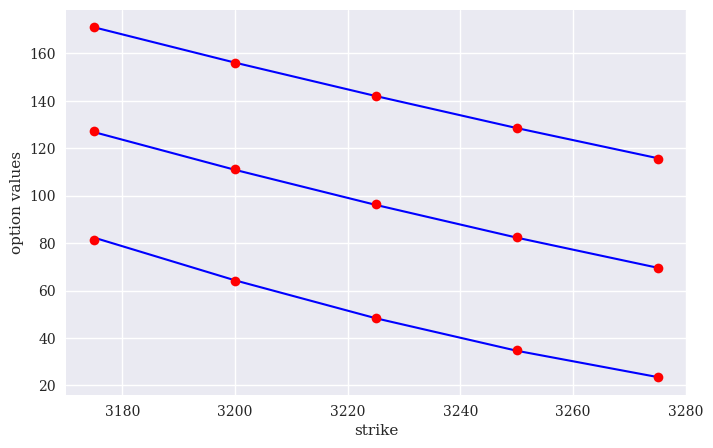

In [185]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for mat in set(options['Maturity']):
    options[options.Maturity == mat].plot(x='Strike', y='Call',
                                          style='b', lw=1.5,
                                          legend=False, ax=ax)
    options[options.Maturity == mat].plot(x='Strike', y='Model',
                                          style='ro', legend=False,
                                          ax=ax)
plt.xlabel('strike')
plt.ylabel('option values')

Saving the results.

In [187]:
filename = 'cal_results_full.h5'
h5 = pd.HDFStore(filename, 'w')
h5['options'] = options
h5.close()

### Implied Volatilities

We also want to compare market with model implied volatilities.

In [189]:
from BSM_imp_vol import call_option
def calculate_implied_volatilities(filename):
    ''' Calculates market and model implied volatilities. '''
    h5 = pd.HDFStore(filename, 'r')
    options = h5['options']
    h5.close()
    for row, option in options.iterrows():
        T = (option['Maturity'] - option['Date']).days / 365.
        B0T = B([kappa_r, theta_r, sigma_r, r0, T])
        r = -math.log(B0T) / T
        call = call_option(S0, option['Strike'], option['Date'],
                            option['Maturity'], option['r'], 0.1)
        options.loc[row, 'market_iv'] = call.imp_vol(option['Call'], 0.15)
        options.loc[row, 'model_iv'] = call.imp_vol(option['Model'], 0.15)
    return options

Calculation of the implied volatilities.

In [191]:
options = calculate_implied_volatilities('cal_results_full.h5')
options

,Date,Strike,Call,Maturity,Put,T,r,Model,market_iv,model_iv
38,2014-09-30,3175.0,126.8,2014-12-19,78.8,0.219178,0.001349,127.089395,0.165195,0.165690
39,2014-09-30,3200.0,110.9,2014-12-19,87.9,0.219178,0.001349,111.236618,0.161488,0.162053
40,2014-09-30,3225.0,96.1,2014-12-19,98.1,0.219178,0.001349,96.318975,0.158014,0.158378
41,2014-09-30,3250.0,82.3,2014-12-19,109.3,0.219178,0.001349,82.396105,0.154499,0.154659
42,2014-09-30,3275.0,69.6,2014-12-19,121.6,0.219178,0.001349,69.523709,0.151021,0.150893
342,2014-09-30,3175.0,171.0,2015-03-20,129.2,0.468493,0.003203,171.031331,0.162021,0.162057
343,2014-09-30,3200.0,156.1,2015-03-20,139.4,0.468493,0.003203,156.121697,0.160002,0.160027
344,2014-09-30,3225.0,142.0,2015-03-20,150.3,0.468493,0.003203,141.885842,0.158126,0.157997
345,2014-09-30,3250.0,128.5,2015-03-20,161.8,0.468493,0.003203,128.343935,0.156142,0.155965
346,2014-09-30,3275.0,115.8,2015-03-20,174.0,0.468493,0.003203,115.513745,0.154257,0.153931


<Axes: xlabel='Strike'>

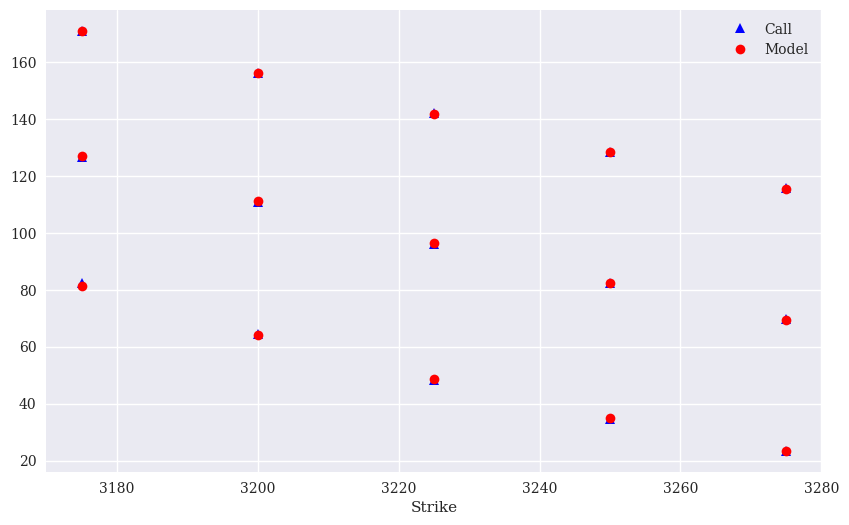

In [193]:
options.set_index('Strike')[['Call', 'Model']].plot(figsize=(10,6), style=['b^', 'ro'])

<Axes: xlabel='Strike'>

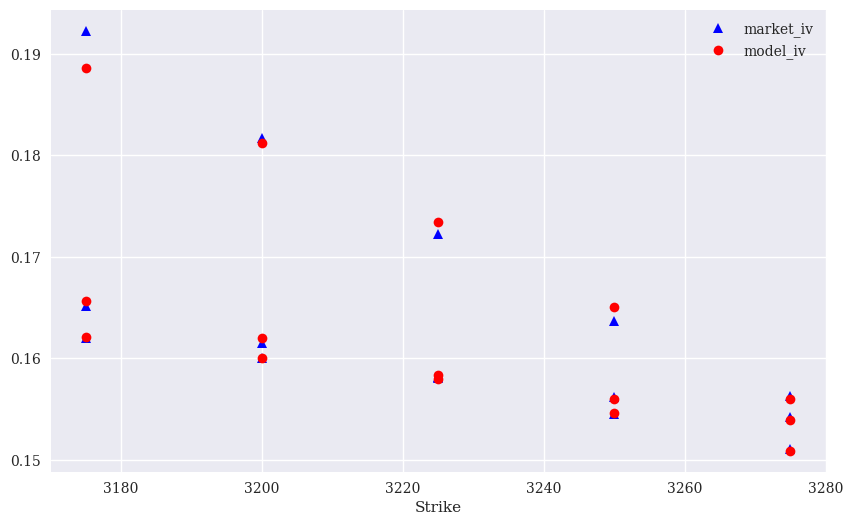

In [195]:
options.set_index('Strike')[['market_iv', 'model_iv']].plot(figsize=(10,6), style=['b^', 'ro'])

A function to plot the implied volatilities.

In [197]:
def plot_implied_volatilities(options, model):
    ''' Plots market implied volatilities against model implied ones. '''
    mats = sorted(set(options.Maturity))
    for mat in mats:
        opts = options[options.Maturity == mat]
        plt.figure(figsize=(8, 6))
        plt.subplot(211)
        plt.ylabel('implied volatility')
        plt.plot(opts.Strike, opts.market_iv, 'b', label='market', lw=1.5)
        plt.plot(opts.Strike, opts.model_iv, 'ro', label='model')
        plt.legend(loc=0)
        plt.axis([min(opts.Strike) - 10, max(opts.Strike) + 10,
              min(opts.market_iv) - 0.015, max(opts.market_iv) + 0.015])
        plt.title('Maturity %s' % str(mat)[:10])
        plt.subplot(212)
        wi = 5.0
        diffs = opts.model_iv.values - opts.market_iv.values
        plt.bar(opts.Strike, diffs, width=wi)
        plt.ylabel('difference')
        ymi = min(diffs) - (max(diffs) - min(diffs)) * 0.1
        yma = max(diffs) + (max(diffs) - min(diffs)) * 0.1
        plt.axis([min(opts.Strike) - 10, max(opts.Strike) + 10, ymi, yma])
        plt.tight_layout()

And the plot.

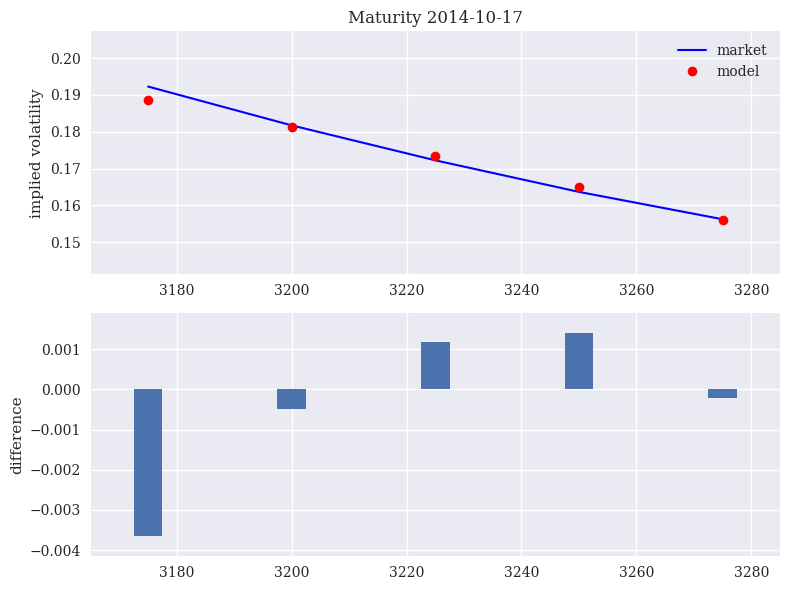

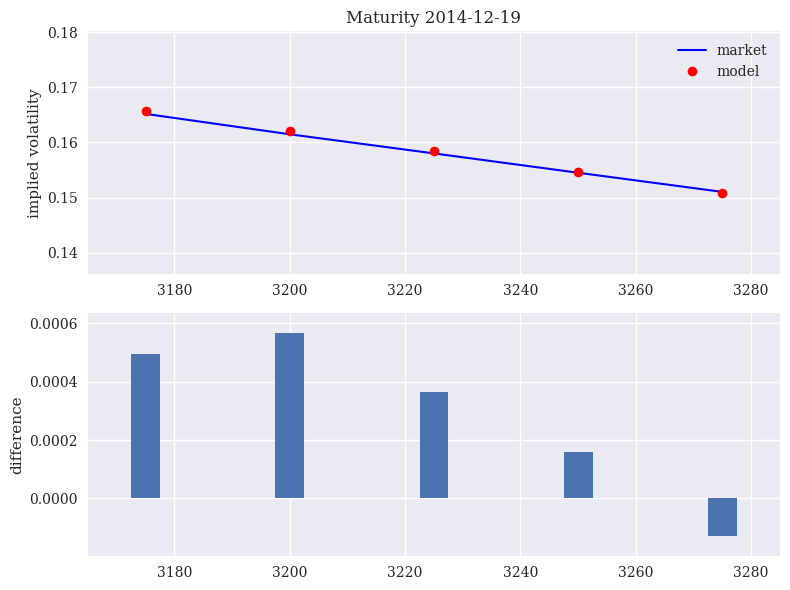

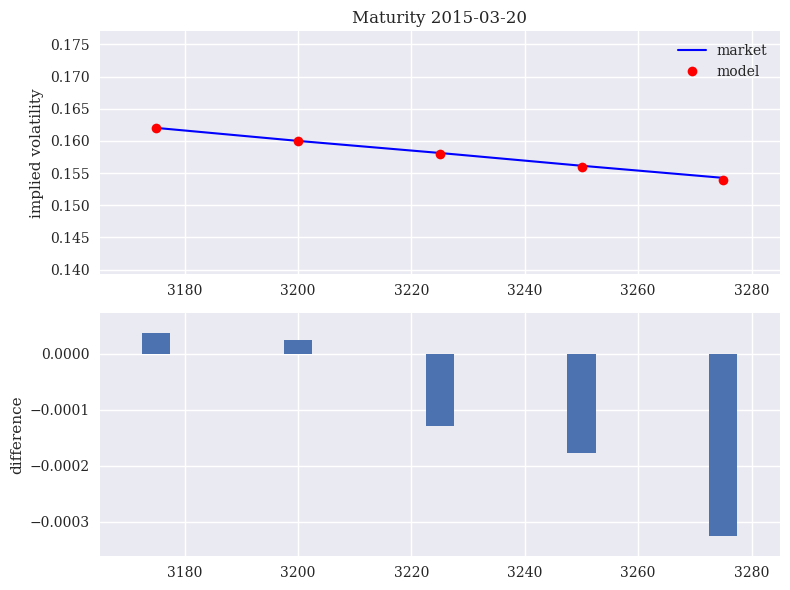

In [199]:
plot_implied_volatilities(options, 'BCC97')

## Conclusions

In conclusion, we can state the following:

* calibration is more of an art than a science
* data issues, numerical issues and more have to be considered
* the general market model is capable of replicating market data (rates, option quotes) reasonably well
* it is important to consider the objective of the calibration

All details, codes, proofs, etc. in the book "Derivatives Analytics with Python" &mdash; cf. [http://derivatives-analytics-with-python.com](http://derivatives-analytics-with-python.com).

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

**Quant Platform** | http://pqp.io

**Python for Finance Training** | http://training.tpq.io

**Certificate in Computational Finance** | http://compfinance.tpq.io

**Derivatives Analytics with Python (Wiley Finance)** |
http://dawp.tpq.io

**Python for Finance (2nd ed., O'Reilly)** |
http://py4fi.tpq.io